In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pylab import *
from scipy.stats import norm
from scipy.stats import uniform
from astropy.io import fits
from astropy import units as u
import os
from IPython.display import Image
%matplotlib inline

In [2]:
########### set the file path ###############
root = '/global/u1/j/jialiu/NGphotoz/'
dir_storage = root+'NGphotoz_scratch/'
dir_cosmos = dir_storage+'Cosmo_maps/'
dir_cov = dir_storage+'Cov_maps/'
dir_bias = dir_storage+'Bias_maps/'

In [14]:
######### photo-z bias parameters
zbias_arr = [0, 0.0003, 0.0007, 0.0015]
sigmaz_arr = [0.01, 0.02, 0.04, 0.06]
out_arr = [0, 0.05, 0.1, 0.15]
theta_g_arr = [1,5,10]

zarr=np.linspace(0,4, 501)
delta_z=0.5
tomo_centers=np.arange(0.5, 3, delta_z)

cosmos = [ '%02d_%s'%(i, j) for i in range(25) for j in ['a','f']]
cosmos += ['fid_a', 'fid_f']
tomo_arr = range(1,6)
cones_bias = arange(1,11)
cones_cov = arange(74, 1100)
cones_cosmo = arange(1,6)

pz_lists = genfromtxt(root+'pz_list.txt', dtype='str')
print (pz_lists[:5])

['pz_true.txt' 'pz_zbias0.0003_simgaz0.01_outlier0.05.txt'
 'pz_zbias0.0003_simgaz0.01_outlier0.1.txt'
 'pz_zbias0.0003_simgaz0.01_outlier0.15.txt'
 'pz_zbias0.0003_simgaz0.01_outlier0.txt']


In [20]:
### bias sample fname: biaspz_zbias0_simgaz0.06_outlier0.txt_tomo4_cone10_s10.npy
### JH: The LOS number runs from 74 to 1100, with some missing LOS. You will have 954 in total. 
### JL: LOS 140 and 135 are missing, 198 tomo 3, 4 are missing

def stats_gen_true (theta_g, tomo, cone):
    ipz='pz_true.txt'
    fn = dir_bias+'bias%s_tomo%i_cone%s_s%i.npy'%(ipz, tomo, cone, theta_g)
    return np.load(fn)

def stats_gen_bias (izbias, isz, iout, theta_g, tomo, cone):
    ipz='pz_zbias%s_simgaz%s_outlier%s.txt'%(izbias, isz, iout)
    fn = dir_bias+'bias%s_tomo%i_cone%s_s%i.npy'%(ipz, tomo, cone, theta_g)
#     print (fn)
    return np.load(fn)

def stats_gen_cov (theta_g, tomo, cone): #### cone goes from 74 to 1099, missing some, total 953
    fn = dir_cov+'cov_tomo%i_cone%s_s%i.npy'%(tomo, cone, theta_g)
#     print (fn)
    return np.load(fn)

def stats_gen_cosmo (cosmo, theta_g, tomo, cone): 
    fn = dir_cosmos+'/%s_tomo%i_cone%s_s%i.npy'%(cosmo, tomo, cone, theta_g)
#     print (fn)
    return np.load(fn)
  
####### test file generation functions - all pass
test = 0
if test:
    izbias, isz, iout = 0.0015, 0.06, 0.15
    theta_g, tomo, cone = 1, 4, 1
    cosmo = cosmos[-5]

    out = stats_gen_true(theta_g, tomo, cone)
    out = stats_gen_bias (izbias, isz, iout, theta_g, tomo, cone)
    out = stats_gen_cov (theta_g, tomo, 74)
    out = stats_gen_cosmo (cosmo, theta_g, tomo, cone)
    ell, ps, ps1, ps2, kappa, peaks, minima, pdf, mf0, mf1, mf2 = out

/global/u1/j/jialiu/NGphotoz/NGphotoz_scratch/Bias_maps/biaspz_zbias0_simgaz0.01_outlier0.txt_tomo4_cone1_s1.npy
0.0015 0.01 0 1 4 1
/global/u1/j/jialiu/NGphotoz/NGphotoz_scratch/Bias_maps/biaspz_zbias0.0015_simgaz0.01_outlier0.txt_tomo4_cone1_s1.npy
0 0.06 0 1 4 1
/global/u1/j/jialiu/NGphotoz/NGphotoz_scratch/Bias_maps/biaspz_zbias0_simgaz0.06_outlier0.txt_tomo4_cone1_s1.npy
0 0.01 0.15 1 4 1
/global/u1/j/jialiu/NGphotoz/NGphotoz_scratch/Bias_maps/biaspz_zbias0_simgaz0.01_outlier0.15.txt_tomo4_cone1_s1.npy


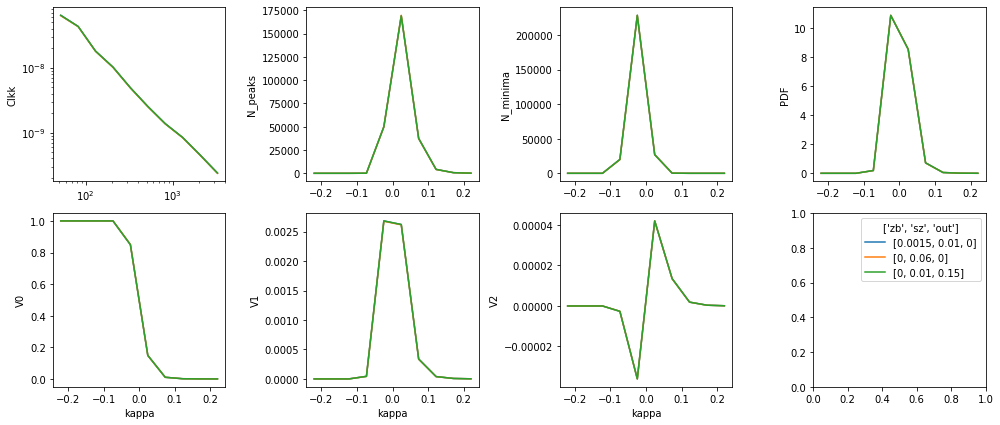

In [6]:
izbias, isz, iout = 0.0015, 0.06, 0.15
theta_g, tomo, cone = 1, 4, 1

params=[[izbias, 0.01, 0, theta_g, tomo, cone],
     [0, isz, 0, theta_g, tomo, cone],
     [0, 0.01, iout, theta_g, tomo, cone]]
out0 = stats_gen(0, 0.01, 0, theta_g, tomo, cone) ## no bias
ell0, ps0, ps10, ps20, kappa0, peaks0, minima0, pdf0, mf00, mf10, mf20 = out0

f,axes=subplots(2,4,figsize=(14,6))
for iparam in params:
    iizbias, iisz, iiout, itheta_g, itomo, icone = iparam
    print (iizbias, iisz, iiout, itheta_g, itomo, icone)
    out = stats_gen(iizbias, iisz, iiout, itheta_g, itomo, icone)
    ell, ps, ps1, ps2, kappa, peaks, minima, pdf, mf0, mf1, mf2 = out
    axes[0][0].plot(ell, ps, label='[%s, %s, %s]'%(iizbias, iisz, iiout))
    axes[0][1].plot(kappa, peaks)
    axes[0][2].plot(kappa, minima)
    axes[0][3].plot(kappa, pdf)
    axes[1][0].plot(kappa, mf0)
    axes[1][1].plot(kappa, mf1)
    axes[1][2].plot(kappa, mf2)
    
lines, labels = axes[0][0].get_legend_handles_labels()
axes[1][3].legend(lines, labels, title=['zb', 'sz', 'out'])

axes[0][0].set_xscale('log')
axes[0][0].set_yscale('log')
axes[1][0].set_xlabel('kappa')
axes[1][1].set_xlabel('kappa')
axes[1][2].set_xlabel('kappa')
axes[0][0].set_ylabel('Clkk')
axes[0][1].set_ylabel('N_peaks')
axes[0][2].set_ylabel('N_minima')
axes[0][3].set_ylabel('PDF')
axes[1][0].set_ylabel('V0')
axes[1][1].set_ylabel('V1')
axes[1][2].set_ylabel('V2')
plt.tight_layout()

/global/u1/j/jialiu/NGphotoz/NGphotoz_scratch/Bias_maps/biaspz_zbias0_simgaz0.01_outlier0.txt_tomo1_cone1_s1.npy
0.0015 0.01 0 1 1 1
/global/u1/j/jialiu/NGphotoz/NGphotoz_scratch/Bias_maps/biaspz_zbias0.0015_simgaz0.01_outlier0.txt_tomo1_cone1_s1.npy
0 0.06 0 1 1 1
/global/u1/j/jialiu/NGphotoz/NGphotoz_scratch/Bias_maps/biaspz_zbias0_simgaz0.06_outlier0.txt_tomo1_cone1_s1.npy


/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


0 0.01 0.15 1 1 1
/global/u1/j/jialiu/NGphotoz/NGphotoz_scratch/Bias_maps/biaspz_zbias0_simgaz0.01_outlier0.15.txt_tomo1_cone1_s1.npy
/global/u1/j/jialiu/NGphotoz/NGphotoz_scratch/Bias_maps/biaspz_zbias0_simgaz0.01_outlier0.txt_tomo2_cone1_s1.npy
0.0015 0.01 0 1 2 1
/global/u1/j/jialiu/NGphotoz/NGphotoz_scratch/Bias_maps/biaspz_zbias0.0015_simgaz0.01_outlier0.txt_tomo2_cone1_s1.npy
0 0.06 0 1 2 1
/global/u1/j/jialiu/NGphotoz/NGphotoz_scratch/Bias_maps/biaspz_zbias0_simgaz0.06_outlier0.txt_tomo2_cone1_s1.npy
0 0.01 0.15 1 2 1
/global/u1/j/jialiu/NGphotoz/NGphotoz_scratch/Bias_maps/biaspz_zbias0_simgaz0.01_outlier0.15.txt_tomo2_cone1_s1.npy
/global/u1/j/jialiu/NGphotoz/NGphotoz_scratch/Bias_maps/biaspz_zbias0_simgaz0.01_outlier0.txt_tomo3_cone1_s1.npy
0.0015 0.01 0 1 3 1
/global/u1/j/jialiu/NGphotoz/NGphotoz_scratch/Bias_maps/biaspz_zbias0.0015_simgaz0.01_outlier0.txt_tomo3_cone1_s1.npy
0 0.06 0 1 3 1
/global/u1/j/jialiu/NGphotoz/NGphotoz_scratch/Bias_maps/biaspz_zbias0_simgaz0.06_outlie

/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide
/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide


/global/u1/j/jialiu/NGphotoz/NGphotoz_scratch/Bias_maps/biaspz_zbias0_simgaz0.01_outlier0.txt_tomo2_cone1_s5.npy
0.0015 0.01 0 5 2 1
/global/u1/j/jialiu/NGphotoz/NGphotoz_scratch/Bias_maps/biaspz_zbias0.0015_simgaz0.01_outlier0.txt_tomo2_cone1_s5.npy
0 0.06 0 5 2 1
/global/u1/j/jialiu/NGphotoz/NGphotoz_scratch/Bias_maps/biaspz_zbias0_simgaz0.06_outlier0.txt_tomo2_cone1_s5.npy
0 0.01 0.15 5 2 1
/global/u1/j/jialiu/NGphotoz/NGphotoz_scratch/Bias_maps/biaspz_zbias0_simgaz0.01_outlier0.15.txt_tomo2_cone1_s5.npy
/global/u1/j/jialiu/NGphotoz/NGphotoz_scratch/Bias_maps/biaspz_zbias0_simgaz0.01_outlier0.txt_tomo3_cone1_s5.npy
0.0015 0.01 0 5 3 1
/global/u1/j/jialiu/NGphotoz/NGphotoz_scratch/Bias_maps/biaspz_zbias0.0015_simgaz0.01_outlier0.txt_tomo3_cone1_s5.npy
0 0.06 0 5 3 1
/global/u1/j/jialiu/NGphotoz/NGphotoz_scratch/Bias_maps/biaspz_zbias0_simgaz0.06_outlier0.txt_tomo3_cone1_s5.npy
0 0.01 0.15 5 3 1
/global/u1/j/jialiu/NGphotoz/NGphotoz_scratch/Bias_maps/biaspz_zbias0_simgaz0.01_outlier0.

KeyboardInterrupt: 

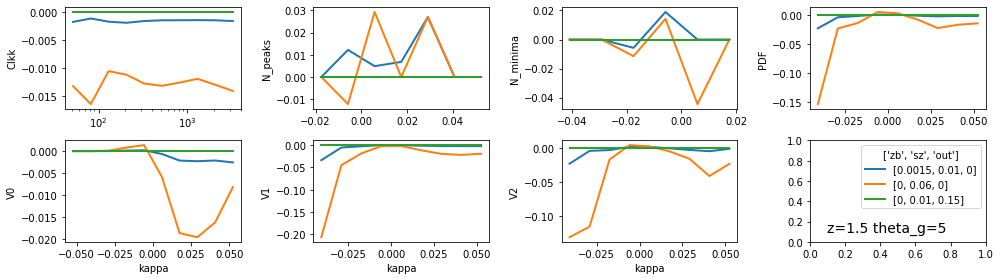

In [7]:
izbias, isz, iout = 0.0015, 0.06, 0.15

theta_g, tomo, cone = 1, 4, 1
for theta_g in theta_g_arr:
    f,axes=subplots(2,4,figsize=(14,4))
    for tomo in range(1,6):       

        ilw=2
        params=[[izbias, 0.01, 0, theta_g, tomo, cone],
                 [0, isz, 0, theta_g, tomo, cone],
                 [0, 0.01, iout, theta_g, tomo, cone]]
        out0 = stats_gen(0, 0.01, 0, theta_g, tomo, cone) ## no bias
        ell0, ps0, ps10, ps20, kappa0, peaks0, minima0, pdf0, mf00, mf10, mf20 = out0

        for iparam in params:
            iizbias, iisz, iiout, itheta_g, itomo, icone = iparam
            print (iizbias, iisz, iiout, itheta_g, itomo, icone)
            out = stats_gen(iizbias, iisz, iiout, itheta_g, itomo, icone)
            ell, ps, ps1, ps2, kappa, peaks, minima, pdf, mf0, mf1, mf2 = out
            axes[0][0].plot(ell, ps/ps0-1, label='[%s, %s, %s]'%(iizbias, iisz, iiout), lw=ilw)
            axes[0][1].plot(kappa, peaks/peaks0-1, lw=ilw)
            axes[0][2].plot(kappa, minima/minima0-1, lw=ilw)## note need to flip the axis
            axes[0][3].plot(kappa, pdf/pdf0-1, lw=ilw)
            axes[1][0].plot(kappa, mf0/mf00-1, lw=ilw)
            axes[1][1].plot(kappa, mf1/mf10-1, lw=ilw)
            axes[1][2].plot(kappa, mf2/mf20-1, lw=ilw)

        lines, labels = axes[0][0].get_legend_handles_labels()
        axes[1][3].legend(lines, labels, title=['zb', 'sz', 'out'])
        axes[1][3].text(0.1,0.1,'z=%s theta_g=%s'%(tomo_centers[tomo-1], theta_g), fontsize=14)

        axes[0][0].set_xscale('log')
        # axes[0][0].set_yscale('log')
        axes[1][0].set_xlabel('kappa')
        axes[1][1].set_xlabel('kappa')
        axes[1][2].set_xlabel('kappa')
        axes[0][0].set_ylabel('Clkk')
        axes[0][1].set_ylabel('N_peaks')
        axes[0][2].set_ylabel('N_minima')
        axes[0][3].set_ylabel('PDF')
        axes[1][0].set_ylabel('V0')
        axes[1][1].set_ylabel('V1')
        axes[1][2].set_ylabel('V2')
    plt.tight_layout()
    savefig('plots/change_thetag%s.jpg'%(theta_g))
    close()